## Supplementary Figure - Capacity with different grids
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../')

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import scipy
import os.path
import pandas
import matplotlib
import shutil
import copy

from simple_dispatch import generatorData
from simple_dispatch import bidStack
from simple_dispatch import dispatch
from simple_dispatch import generatorDataShort
from future_grid import FutureDemand
from future_grid import FutureGrid
from simple_dispatch import StorageModel

In [11]:
for evscenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']:
    for controlscenario in ['_Timers12am_noWPcontrol', '_TimersRandom_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']:
        val = pd.read_csv('Results/Fuel1_Solar5_Wind5_2035/fuel1_solar5_wind5_'+evscenario+controlscenario+'_penlevel1.0_storagebefore_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
        if val > 0:
            print(evscenario, controlscenario, val)

UniversalHome _Timers9pm_noWPcontrol 5654


In [17]:
pd.read_csv('Results/Fuel1_Solar5_Wind5_2035/fuel1_solar5_wind5_BusinessAsUsual_TimersMixed_WPcontrol_minpeak_penlevel1.0_storagebefore_storage_stats_20220408.csv')

,Storage Rate Result,Storage Capacity
0,0,0


In [21]:
maxpen_results10GW = pd.read_csv('Results/max_penetration_levels_1h_2035_10GWstorage_20220408.csv', index_col=0)
maxpen_results10GW_bau = pd.read_csv('Results/max_penetration_levels_1h_bau_2035_10GWstorage_20220408.csv', index_col=0)

In [39]:
maxpen_results10GW_HighRenew = maxpen_results10GW.copy(deep=True)
maxpen_results10GW_HighRenew_bau = maxpen_results10GW_bau.copy(deep=True)

In [40]:
maxpen_results10GW_HighRenew.loc[:, :] = 1
maxpen_results10GW_HighRenew_bau.loc[:, :] = 1

In [41]:
maxpen_results10GW


,fuel1_solar3.5_wind3_UniversalHome_noWPcontrol,fuel1_solar3.5_wind3_UniversalHome_WPcontrol_avgem,fuel1_solar3.5_wind3_UniversalHome_WPcontrol_minpeak,fuel1_solar3.5_wind3_HighHome_noWPcontrol,fuel1_solar3.5_wind3_HighHome_WPcontrol_avgem,fuel1_solar3.5_wind3_HighHome_WPcontrol_minpeak,fuel1_solar3.5_wind3_LowHome_HighWork_noWPcontrol,fuel1_solar3.5_wind3_LowHome_HighWork_WPcontrol_avgem,fuel1_solar3.5_wind3_LowHome_HighWork_WPcontrol_minpeak,fuel1_solar3.5_wind3_LowHome_LowWork_noWPcontrol,fuel1_solar3.5_wind3_LowHome_LowWork_WPcontrol_avgem,fuel1_solar3.5_wind3_LowHome_LowWork_WPcontrol_minpeak
TimersRandom,0.83,NaN,NaN,1.00,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
Timers9pm,0.59,NaN,NaN,0.79,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
Timers12am,0.86,NaN,NaN,1.00,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
TimersNone,0.67,0.67,0.67,0.89,0.89,0.89,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
gd_short = pickle.load(open('IntermediateOutputs/generator_data_short_WECC_2019.obj', 'rb'))
limits_2035_long = pd.read_csv('IntermediateOutputs/limits_2035_long.csv')

timer_names = {'':'Timers9pm', '_midnighttimers':'Timers12am', '_NoTimers':'TimersNone', '_RandomTimers':'RandomTimers'}
fuel = 1
solar = 5
wind = 5
ev_scenario = 'UniversalHome'
ev_workplace_bool=False
ev_timers = '' # 9pm
ev_scenario_date = '20220313'
grid = FutureGrid(gd_short)
maxpen_results10GW_HighRenew.loc['Timers9pm', 'fuel1_solar3.5_wind3_'+ev_scenario+'_noWPcontrol'] = grid.find_capacity_limit_1_binarysearch(with_storage_before=True, cap=40000, max_rate=10000, bs_limits=None, lims_8760=limits_2035_long['limit2'].values, 
                                                                year=2035, solar=solar, wind=wind, fuel=fuel,
                                                                ev_scenario=ev_scenario, ev_timers=ev_timers, ev_workplace_control='', ev_workplace_bool=ev_workplace_bool, evs_bool=True, ev_scenario_date=ev_scenario_date)


Short Binary Search: 
Solving optimization.
0.5 : 0
Solving optimization.
0.75 : 0
Solving optimization.
0.88 : 3
Linear search from starting point:  0.75
0.75
Solving optimization.
0.76
Solving optimization.
0.77
Solving optimization.
0.78
Solving optimization.
0.79
Solving optimization.
0.8
Solving optimization.
0.81
Solving optimization.
0.8200000000000001
Solving optimization.
0.8300000000000001
Solving optimization.
0.8400000000000001
Solving optimization.
Total overs:  1
Violation 1:  0.8400000000000001


In [37]:
maxpen_results10GW_HighRenew.loc['Timers9pm', 'fuel1_solar3.5_wind3_'+ev_scenario+'_noWPcontrol'] = 0.84

In [34]:
def fig3c(maxpen_results, cols, cols1, cols2, maxpen_result_bau, axes, legend=True, save_str=None, showx=False, title=''):
#     fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
    titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
    colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
    control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Random SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
    hatches = ['//', '/', '///', '', '.', 'o']

    axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
    if showx:
        axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
        axes.set_xlabel('Access Scenario', fontsize=14)
    else:
        axes.set_xticklabels([])
    axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)

    values = maxpen_results.loc['Timers9pm', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, values, 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
    values = maxpen_results.loc['Timers12am', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, values, 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1])
    values = maxpen_results.loc['TimersRandom', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5]), values, 0.1, color=colors[2], label=control_labels[2], edgecolor='k', hatch=hatches[2])
    values = maxpen_results.loc['TimersNone', cols1]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, values, 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
    values = maxpen_results.loc['TimersNone', cols2]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.3, values, 0.1, color=colors[5], label=control_labels[5], edgecolor='k', hatch=hatches[5])
    values = maxpen_results.loc['TimersNone', cols]
    axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, values, 0.1, color=colors[3], edgecolor='k', label=control_labels[3], hatch=hatches[3])
    axes.bar([1.75], maxpen_result_bau, 0.1, color='#ffffbf', edgecolor='k', hatch='x')
        
    edgecolors=[None, None, 'k', None, None]
    legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                                 label=control_labels[i]) for i in range(len(control_labels))]
    legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
    if legend:
        axes.legend(handles=legend_elements, loc=(1, 1), fontsize=10.5, ncol=1)
        
    
    axes.set_ylabel('Max Level of EVs Supported', fontsize=12)
    axes.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axes.set_yticklabels(['0', '20%', '40%', '60%', '80%','100%'], fontsize=12)
#     axes.set_xlabel('Access Scenario', fontsize=12)
    axes.set_axisbelow(True)        
    axes.grid(axis='y')
    axes.set_title(title, fontsize=16)

    plt.tight_layout()
    if save_str is not None:
        plt.savefig('SupplementPlotting/Plots/'+save_str+'.pdf', bbox_inches='tight')
        plt.show()
    
    return axes

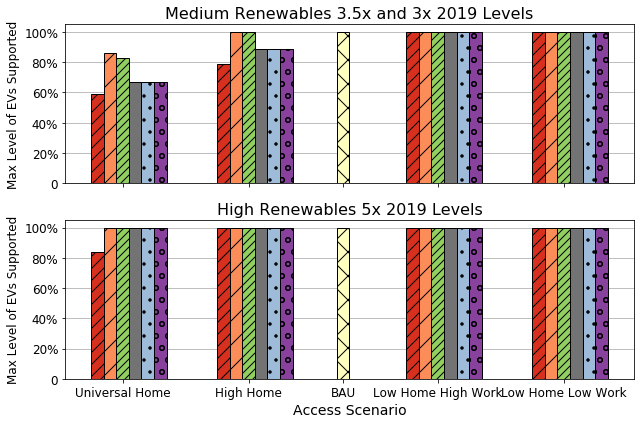

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True, sharey=True)

solar = 3.5
wind = 3
cols = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_noWPcontrol' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols1 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_minpeak' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols2 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_avgem' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
ax[0] = fig3c(maxpen_results10GW, cols, cols1, cols2, maxpen_results10GW_bau.loc['TimersMixed', 'fuel1_solar'+str(solar)+'_wind'+str(wind)+'_BusinessAsUsual_WPcontrol_minpeak'], 
              ax[0], legend=False, save_str=None, title='Medium Renewables 3.5x and 3x 2019 Levels')

solar = 3.5 # actually 5 and 5, but labels copied from old df
wind = 3
cols = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_noWPcontrol' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols1 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_minpeak' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
cols2 = ['fuel1_solar'+str(solar)+'_wind'+str(wind)+'_'+scenario+'_WPcontrol_avgem' for scenario in ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']]
ax[1] = fig3c(maxpen_results10GW_HighRenew, cols, cols1, cols2, maxpen_results10GW_HighRenew_bau.loc['TimersMixed', 'fuel1_solar'+str(solar)+'_wind'+str(wind)+'_BusinessAsUsual_WPcontrol_minpeak'], 
              ax[1], showx=True, legend=False, save_str='supfig20_2035', title='High Renewables 5x 2019 Levels')
